<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/Lab_1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab One

## Setting Up
### Downloading Python
Go to https://www.python.org/downloads/ and download the latest version of python.
Open the installer. If you're on Windows, check the box that says "Add Python 3.x to PATH". Step through the installer until the newest version of Python is downloaded.
### Downloading PyCharm
Go to https://www.jetbrains.com/pycharm/ and click the teal Download button. Scroll down to where it says "PyCharm Community Edition" and download the free version of PyCharm.
### Installing packages
For this lab, we will need the `pandas` package. In the terminal window, paste the following:

```
python3 -m pip install pandas

```
Alternatively, you can use the Python Packages window, search for the `pandas` package, and install it through there. This process can be followed to download any of the necessary packages for this lab. If you attempt to import a package without having it installed, PyCharm will raise an error, indicated by a exclamation point within a red circle. You can click this to view a dropdown box where you can choose to download the missing package directly.


## Simulating Regression Data

For linear regression, we can look at a statistical model as being made from two components:
1. A functional relationship between two variables.


$$ y_i = f(x_i)$$
This component is deterministic. That means that there's no randomness, for every $x_i$ we produce only 1 value for $y_i$.

2. A probability distribution to describe error. We'll use the normal distribution to start.


$$\epsilon_i \sim \mathcal{N}(0,\sigma^2)$$
The component is stochastic. That means it's random.

The true statistical model is:
$$ y_i \sim f(x_i) +\epsilon_i $$
or, for simple linear regression
$$\underbrace{y_i}_{DV} \sim \underbrace{\beta_0}_{Intercept} + \underbrace{\beta_1}_{slope}\underbrace{x_i}_{IV}+\underbrace{\epsilon_i}_{error}$$

where DV is dependent variable, and IV is independent variable.

### Create a functional relationship

Let's create a data frame of $x$ and $y$ values linked by a functional relationship.
We'll say that the slope is 5, and the intercept is 2.

In [ ]:
# Load the pandas Python package, which we can use for data manipulation.
import pandas as pd

# Create a DataFrame with 50 rows and 1 column (xvar).
# The values of xvar are sequential integers from 1 to 50. They are stored as "numeric" (integers in this case).
df = pd.DataFrame({'xvar': range(1, 51)})

# Check the DataFrame to make sure it is what we think it is.

In [ ]:
# Check the data structure (is it a DataFrame?) and the variable types (numeric?)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xvar    50 non-null     int64  
 1   e       50 non-null     float64
 2   yvar    50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB
None


In [ ]:
# How do the first rows look?
print(df.head())

   xvar
0     1
1     2
2     3
3     4
4     5


In [ ]:
# Great!
# Let's modify our data frame to create a new variable.

df['yvar'] = 5 + 2 * df['xvar']

# Inspect the new DataFrame
# Are the variables still both numeric?
# Is it still a DataFrame?
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   xvar    50 non-null     int64
 1   yvar    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes
None


In [ ]:
# Check the head of the DataFrame.
print(df.head())

   xvar  yvar
0     1     7
1     2     9
2     3    11
3     4    13
4     5    15


### Plot the functional relationship


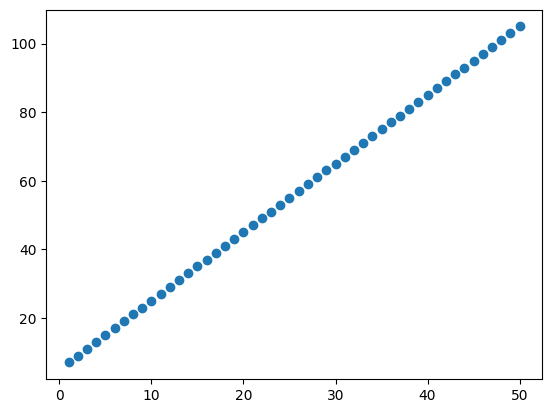

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['xvar'], df['yvar'])
plt.show()

### Create the error

We need to generate error if we want to mimic a real statistical relationship.
We can do that using the random number generators in R.

In [ ]:
import numpy as np

np.random.seed(90210)
e = pd.DataFrame({'error': np.random.normal(loc=0, scale=10, size=50)})

A quick and dirty way to make histograms is to use the `hist()` function.
Let's do that now to confirm that our data are normal-ish.

### Plot the error
We can visualize the error we have created using a few different kinds of plots.

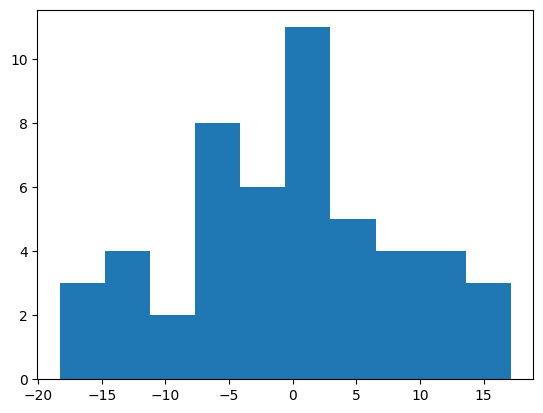

In [ ]:
# Histogram

plt.hist(e)
plt.show()

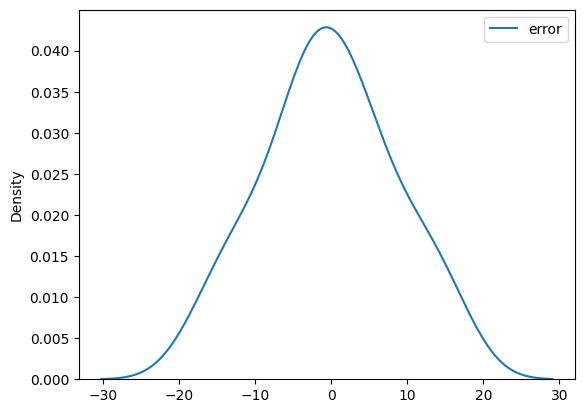

In [ ]:
# Density plot

sns.kdeplot(e)
plt.show()

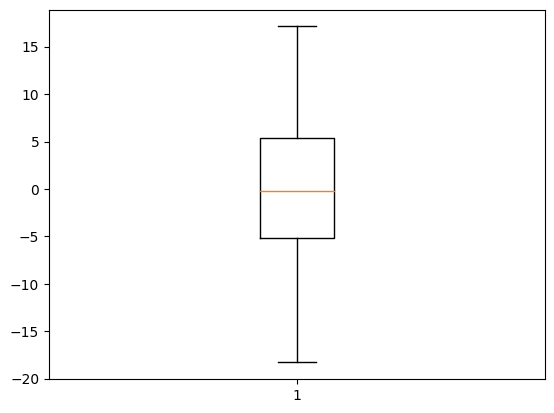

In [ ]:
# Boxplot

plt.boxplot(e)
plt.show()

We generated our error from a normal distribution, and, as we'd expect, it appears to be normally distributed. This meets our assumptions for fitting a linear regression model.

### Create the statistical relationship

OK!
Let's combine these components to simulate some regression data.

In [ ]:
np.random.seed(90210)

# Create the data frame
df = pd.DataFrame({
    'xvar': np.arange(1, 51),  # Equivalent to 1:50 in R
    'e': np.random.normal(loc=0, scale=10, size=50)  # rnorm(n = 50, mean = 0, sd = 10)
})

df['yvar'] = 5 + 2*df['xvar'] + df['e']

### Plot the statistical relationship

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
p2 = sns.regplot(x='xvar', y='yvar', data=df, ci=95, scatter_kws={'s': 25, "color":"black"}, line_kws={"color":"blue"})

# Add labels and title
p2.set_xlabel('xvar')
p2.set_ylabel('yvar')
p2.set_title('Scatter plot with linear regression line')

# Show the plot
plt.show()


Looks like regression data!

## Regression with Example Data

In the real world, you won't be performing regression from data that you generated yourself.
With a regression model we're trying to estimate 3 parameters:

1. Intercept
1. Slope
1. Error variance

Essentially, the statistical puzzle we're faced with in the real world is:

$$y_i \sim \underbrace{?}_{Int} + \underbrace{?}_{slope}\cdot x_i + \epsilon_i$$
where
$$\epsilon_i\sim \mathcal{N}(0,\underbrace{?}_{Var})$$

##Uploading Files to google colab

1.

In [ ]:
# Load the pandas Python package, which we can use for data manipulation.
import pandas as pd
from google.colab import files
uploaded = files.upload()
# pd.read_csv() can be used to read a .csv file from a path.
df2 = pd.read_csv("Iris.csv")



# df.head() can be used to glance at the first few rows of the DataFrame, to make sure our data looks as we expect.
df2.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# df.columns.tolist() will give the names of the columns,
df2.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [ ]:
#df.describe() is a helpful function to return summary statistics of our columns.
df2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


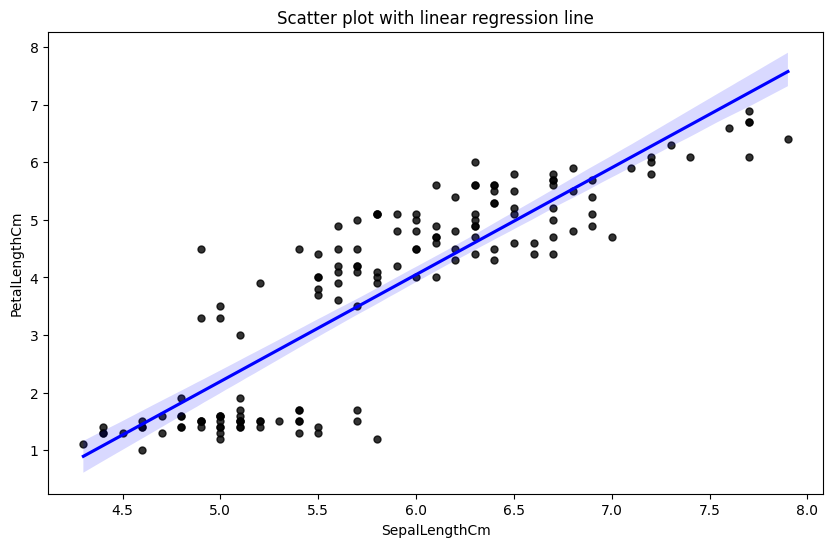

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
p2 = sns.regplot(x='SepalLengthCm', y='PetalLengthCm', data=df2, ci=95, scatter_kws={'s': 25, "color":"black"}, line_kws={"color":"blue"})

# Add labels and title
p2.set_xlabel('SepalLengthCm')
p2.set_ylabel('PetalLengthCm')
p2.set_title('Scatter plot with linear regression line')

# Show the plot
plt.show()

In [ ]:
import statsmodels.api as sm

X = df2['SepalLengthCm']
y = df2['PetalLengthCm']

# Add a constant (intercept term) to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.04e-47
Time:                        19:26:20   Log-Likelihood:                -190.49
No. Observations:                 150   AIC:                             385.0
Df Residuals:                     148   BIC:                             391.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.0954      0.506    -14.011

From this summary, we can pull our slope, intercept, and R-squared values. Our slope is the coefficient (`coef`) of `SepalLengthCm`, 1.8575; our intercept is the coefficient of `const`, -7.0954; and the R-squared value is 0.760.

This summary shows that our slope estimate is significantly different from zero. This is important, this is a major point of simple linear regression. It means that there is a positive relationship between `SepalLengthCm` and `PetalLengthCm`. From our graphs, we suspect that it's a linear relationship.
If you see the $R^2$ value, you'll may also be able to recognize that it's a strong relationship. We hope to get to that later in the course.

The summary output also shows that the intercept is not significantly different from zero. We often don't care too much about the intercept, it just helps the model fit nicely. There are cases where the intercept will matter, however a lot of the time the value $x=0$ isn't within our inference space.

Now, let's check if the errors from the model are normally distributed. One way to do this, as we saw before, is with a box plot.

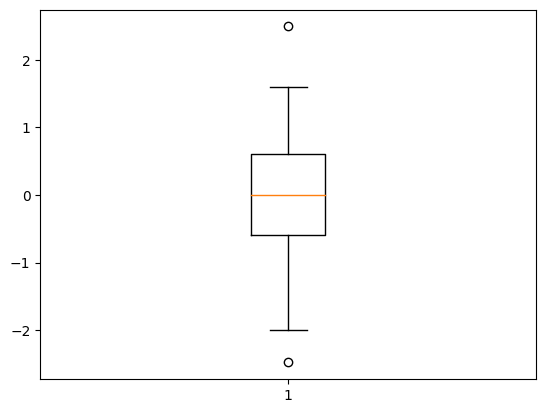

In [ ]:
error = model.resid

plt.boxplot(error)
plt.show()

Another way to do this, however, is with a Q-Q plot. Q-Q, or quantile-quantile plots, are used to assess the normality of a distribution: the closer the data fits to the straight diagonal line, the closer it follows a normal distribution.

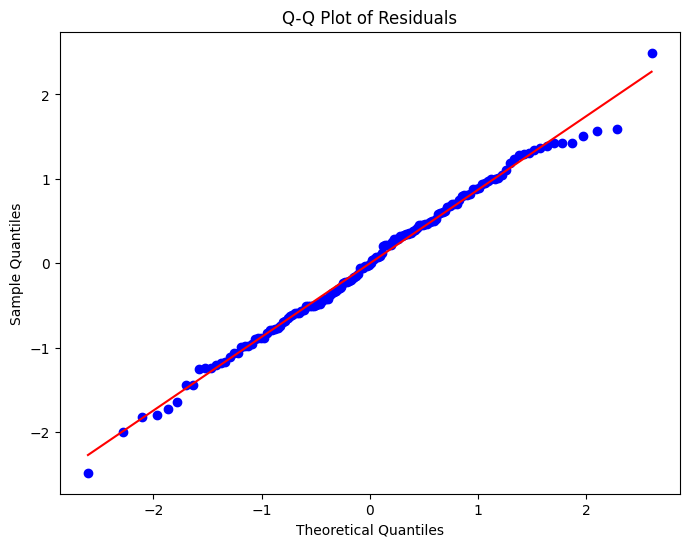

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(error, dist="norm", plot=plt)

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')

plt.show()


Well, the residuals certainly look normally distributed, but how can we tell for sure? The answer is to run the Shapiro-Wilk test, which is a statistical test for normality.

In [ ]:
shapiro_test = stats.shapiro(error)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
print(f"p-value: {shapiro_test.pvalue}")

# If the p-value of the test are > 0.05, the residuals appear to be normally distributed.

Shapiro-Wilk Test Statistic: 0.9944087306957963
p-value: 0.8351222634393064


Because we have a p-value of 0.835, which is higher than our alpha value of 0.05, we can say for sure that our residuals are normally distributed, and regression model meets our assumptions.


## Distribution Functions in Python

The scipy package contains many distributions and functions for working with them. We will go over these in more detail in future lectures.

In [ ]:
import scipy.stats as stats

# Continuous distributions
stats.expon # Exponential distribution
stats.lognorm # Log-Normal distribution
stats.weibull_min # Weibull distribution
stats.gamma # Gamma distribution
stats.beta # Beta distribution
stats.cauchy # Cauchy distribution
stats.triang # Triangular distribution

# Discrete distributions
stats.binom # Binomial distribution
stats.hypergeom # Hyper-geometric distribution
stats.geom # Geometric distribution
stats.poisson # Poisson distribution
stats.bernoulli # Bernoulli distribution
stats.norm # Normal distribution

We can use these functions to generate probability distributions. For example, let's generate a probability distribution for the number of heads you would get after flipping ten coins.

In [ ]:
coin = stats.binom(n = 10, p= 0.5)   # Binomial Distribution with p=0.5

#### Expected Value (EV)
`.expect()`: the expected value, or mean, of the distribution.

In [ ]:
print(coin.expect()) # What is the number of heads you would expect from flipping ten coins?

4.999999999999999


#### Cumulative Distribution Function (CDF)
`.cdf()`: get the probability of all outcomes less than or equal to a given value x. When creating a density plot for the probability distribution, this is the total area of everything less than or equal to x.


This is equivalent to using a *z-score* to find a probability. Be careful with discrete distributions.

In [ ]:
print(coin.cdf(3)) # What percentage of results have 3 or fewer heads?
print(1-coin.cdf(5)) # What percentage of results have 6 or more heads?
print(coin.cdf(0.2)) # What percentage of results have 0.2 or fewer heads?

0.171875
0.376953125
0.0009765625


Even though you can receive a value for that last function, it doesn't actually make any sense.

#### Probability Point Function (PPF)

`.ppf()`: the exact point where the probability of everything to left is equal to y, also known as the percentile function.

In [ ]:
print(coin.ppf(0.2)) # What is the 20%-tile of heads?
print(coin.ppf(0.5)) # What is the 50%-tile of heads?
print(coin.ppf(0.99)) # What is the 99%-tile of heads?

4.0
5.0
9.0


#### Probability Mass Function (PMF)

`.pmf()`: the percentage chance of *exactly* x successes occuring.

In [ ]:
print(coin.pmf(5))  # What percentage of results have exactly five coins land on heads?
print(coin.pmf(1))  # What is the chance that exactly one coin lands on heads?

0.24609375000000003
0.009765625000000002
